# Python Basics for Data Science - Final Assignment

<br>

**Table of contents**

1. [Libraries](#Libraries)
2. [Web Scraping Function](#Web-Scraping-Function) <br>
    i.  [Understanding how it works](#Understanding-how-it-works)<br>
    ii. [Defining the function](#Defining-the-function)
3. [Question 1](#Question-1)
4. [Question 2](#Question-2)
5. [Extra Question](#Extra-Question)
6. [Conclusions](#Conclusions)

## Libraries

Let's start our notebook by importing the necessary libraries and setting some parameters for the whole notebook:

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.precision', 3)

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import requests
from bs4 import BeautifulSoup

font_size = 15

## Web Scraping Function

In this section, we will define the function `get_basketball_stats`. Our function will only require one argument which is going to be the URL of the [Wikipedia](en.wikipedia.org) page of a particular player. It will then return a dictionary corresponding to the Regular Season statistics of that player. 

I will initially go through every step and explain how our function works. If you want to skip this subsection, please click [here](#Defining-the-function).

### Understanding how it works

Our web scraping function is based on two specialized Python libraries. The first one is the `requests` library which allows us to read a webpage by using the `get()` method on the corresponding URL:

In [2]:
mj_link = 'https://en.wikipedia.org/wiki/Michael_Jordan'

response = requests.get(mj_link)

After getting the page from Wikipedia, we now need the `BeautifulSoup` library which is used 'for pulling data out of HTML and XML files' ([documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)).

We can create a `BeautifulSoup` object by passing our HTML content along with the type of parser we want to use:

In [3]:
soup = BeautifulSoup(response.text, 'html.parser')

The player stats are defined with the attribute CSS class set to 'wikitable sortable'. We can use the `find()` method to create a new object for only that class:

In [4]:
table = soup.find(class_ = 'wikitable sortable')

The headers of our table are the first table row (tr). We can isolate them in a new variable:

In [5]:
headers = table.tr
headers

<tr>
<th scope="col">Year
</th>
<th scope="col">Team
</th>
<th scope="col"><abbr title="Games played">GP</abbr>
</th>
<th scope="col"><abbr title="Games started">GS</abbr>
</th>
<th scope="col"><abbr title="Minutes per game">MPG</abbr>
</th>
<th scope="col"><abbr title="Field goal percentage">FG%</abbr>
</th>
<th scope="col"><abbr title="3-point field-goal percentage">3P%</abbr>
</th>
<th scope="col"><abbr title="Free-throw percentage">FT%</abbr>
</th>
<th scope="col"><abbr title="Rebounds per game">RPG</abbr>
</th>
<th scope="col"><abbr title="Assists per game">APG</abbr>
</th>
<th scope="col"><abbr title="Steals per game">SPG</abbr>
</th>
<th scope="col"><abbr title="Blocks per game">BPG</abbr>
</th>
<th scope="col"><abbr title="Points per game">PPG</abbr>
</th></tr>

The table column names are displayed  as an abbreviation; therefore we find all 'abbr' tags using the `find_all()` method:

In [6]:
titles = headers.find_all('abbr')
titles

[<abbr title="Games played">GP</abbr>,
 <abbr title="Games started">GS</abbr>,
 <abbr title="Minutes per game">MPG</abbr>,
 <abbr title="Field goal percentage">FG%</abbr>,
 <abbr title="3-point field-goal percentage">3P%</abbr>,
 <abbr title="Free-throw percentage">FT%</abbr>,
 <abbr title="Rebounds per game">RPG</abbr>,
 <abbr title="Assists per game">APG</abbr>,
 <abbr title="Steals per game">SPG</abbr>,
 <abbr title="Blocks per game">BPG</abbr>,
 <abbr title="Points per game">PPG</abbr>]

Then, we create a dictionary and pass the table headers as its keys:

In [7]:
data = {title['title']:[] for title in titles}

The last step is to fill the dictionary's values. For this purpose, we iterate over each table row by fining each table tag 'tr'. For each row, we iterate over all columns and append each column's value to the corresponding (dictionary) key:

In [8]:
for row in table.find_all('tr')[1:]:
    for key,a in zip(data.keys(), row.find_all('td')[2:]):
        data[key].append(''.join(c for c in a.text if (c.isdigit() or c == '.')))

Finally, we remove extra rows ('Career' and 'All-Star') by finding the smallest list and convert the elements in the key to floats:

In [9]:
Min = min([len(x)  for x in data.values()])
for key in data.keys():
    data[key] = list(map(lambda x: float(x), data[key][:Min]))    

### Defining the function

Let's combine all those steps into a function:

In [10]:
def get_basketball_stats(link):
    response = requests.get(link)
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find(class_ = 'wikitable sortable')
    
    headers = table.tr
    titles = headers.find_all('abbr')
    
    data = {title['title']:[] for title in titles}
    
    for row in table.find_all('tr')[1:]:
        for key,a in zip(data.keys(), row.find_all('td')[2:]):
            data[key].append(''.join(c for c in a.text if (c.isdigit() or c == '.')))
            
    Min = min([len(x)  for x in data.values()])
    for key in data.keys():
        data[key] = list(map(lambda x: float(x), data[key][:Min]))
        
    return data

## Question 1

For each player,

- Create a Python dictionary from the table 'Regular season' on Wikipedia,
- Convert the dictionary to a Pandas Dataframe using the constructor `pd.DataFrame()`, and
- Display the Dataframe and print the name of each player above the Dataframe.

Again, the assignment asks us to analyze four NBA players (Michael Jordan , Kobe Bryant, Lebron James and Stephen Curry). I will only focus on Michael Jordan, since the same process can be repeated for the other three players.

In [11]:
mj_dict = get_basketball_stats(mj_link)

mj_df = pd.DataFrame(mj_dict)
mj_df.index = mj_df.index + 1
mj_df[['Games played', 'Games started']] = mj_df[['Games played', 'Games started']].astype('int')

print ('\nMichael Jordan:')
mj_df.style.highlight_max(color = 'lightcoral', axis = 0)


Michael Jordan:


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
1,82,82,38.300,0.515,0.173,0.845,6.500,5.900,2.400,0.800,28.200
2,18,7,25.100,0.457,0.167,0.840,3.600,2.900,2.100,1.200,22.700
3,82,82,40.000,0.482,0.182,0.857,5.200,4.600,2.900,1.500,37.100
4,82,82,40.400,0.535,0.132,0.841,5.500,5.900,3.200,1.600,35.000
5,81,81,40.200,0.538,0.276,0.850,8.000,8.000,2.900,0.800,32.500
6,82,82,39.000,0.526,0.376,0.848,6.900,6.300,2.800,0.700,33.600
7,82,82,37.000,0.539,0.312,0.851,6.000,5.500,2.700,1.000,31.500
8,80,80,38.800,0.519,0.270,0.832,6.400,6.100,2.300,0.900,30.100
9,78,78,39.300,0.495,0.352,0.837,6.700,5.500,2.800,0.800,32.600
10,17,17,39.300,0.411,0.500,0.801,6.900,5.300,1.800,0.800,26.900


I also highlighted the maximum value for each feature (not shown on GitHub). The most important things to note are:

- MJ played in all 82 games of the regular season in 9 seasons! Interestingly, he was in the starting line-up in 8 of these seasons. 
- MJ always had a high field goal percentage (> 41%) and he exceeded 50% in 6 seasons.
- He started his career with a low 3-point field-goal percentage but gradually improved it reaching 50% during his 10th season in the NBA.

## Question 2

Plot the 'Points per Game' for one player using the function `plt.plot()`:

In [12]:
years = np.arange(1985, 1994)
years = np.append(years, np.arange(1995, 1999))
years = np.append(years, np.array([2002, 2003]))

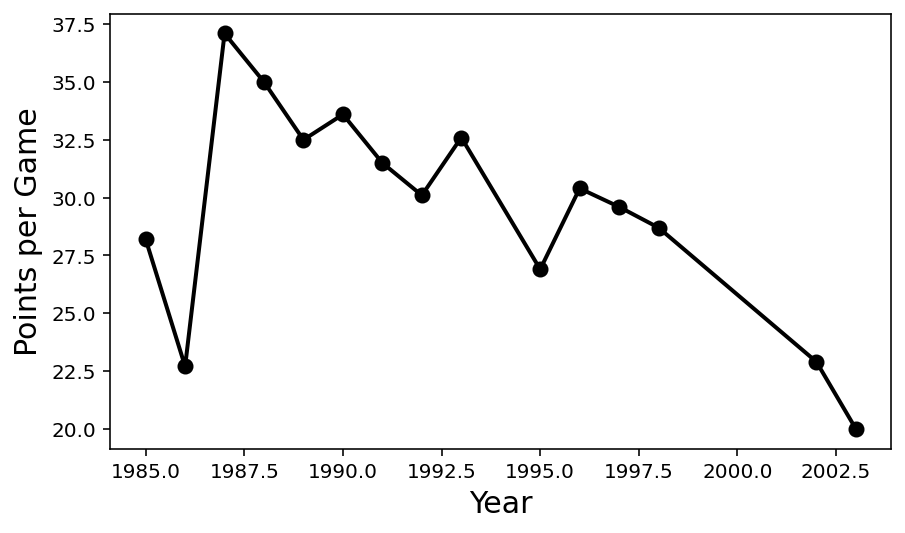

In [13]:
fig = plt.figure(figsize = (7, 4))

plt.plot(years, mj_df['Points per game'], color = 'black', marker = 'o', linestyle = '-', lw = 2, markersize = 7)
plt.xlabel('Year', size = font_size)
plt.ylabel('Points per Game', size = font_size);

We can **improve** this plot:

In [14]:
champion_years = [1991, 1992, 1993, 1996, 1997, 1998]
mask = np.isin(years, champion_years)
mj_champion_df = mj_df[mask]

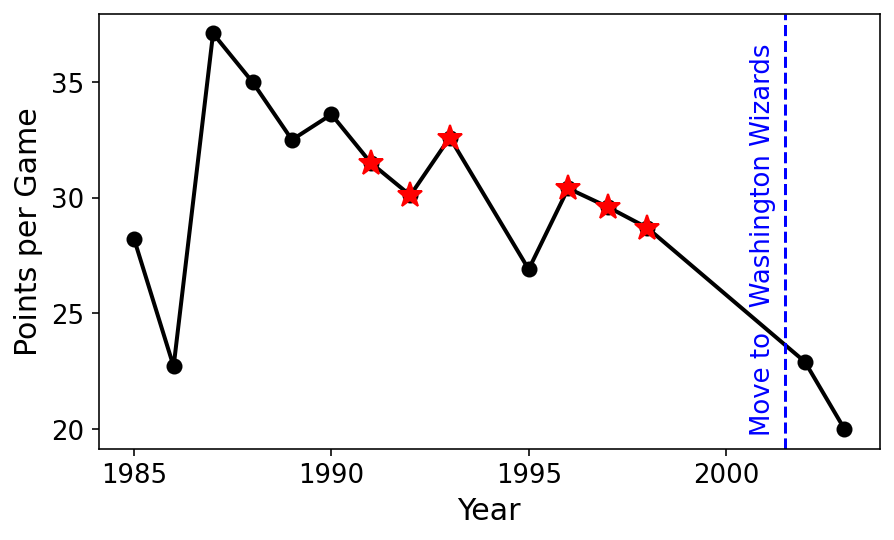

In [15]:
fig = plt.figure(figsize = (7, 4))

plt.plot(years, mj_df['Points per game'], color = 'black', marker = 'o', linestyle = '-', lw = 2, markersize = 7)
plt.plot(champion_years, mj_champion_df['Points per game'], marker = '*', color = 'red', linestyle = '', lw = 2, markersize = 13, label = 'NBA champion')

plt.text(x = 2000.6, y = 20, s = 'Move to   Washington Wizards', color = 'blue', rotation = 90, size = font_size - 2)
plt.axvline(x = 2001.5, color = 'blue', linestyle = '--')

plt.xlabel('Year', size = font_size)
plt.xticks([1985, 1990, 1995, 2000], size = font_size - 2)
plt.ylabel('Points per Game', size = font_size)
plt.yticks([20, 25, 30, 35], size = font_size - 2);

# plt.legend(bbox_to_anchor = [0.6, 0.92], loc = 'center', frameon = False, fontsize = font_size - 2);

A red star indicates a year in which MJ won the NBA championship.

## Extra Question

Compare Lebron James with Michael Jordan with respect to 'Points per Game' per season of their career.

In [16]:
lj_link = 'https://en.wikipedia.org/wiki/LeBron_James'
lj_df = pd.DataFrame(get_basketball_stats(lj_link))
lj_df.index = lj_df.index + 1

In [17]:
lj_champion_years = [2012, 2013, 2016, 2020]
mask = np.isin(np.arange(2004, 2021, 1), lj_champion_years)
lj_champion_df = lj_df[mask]

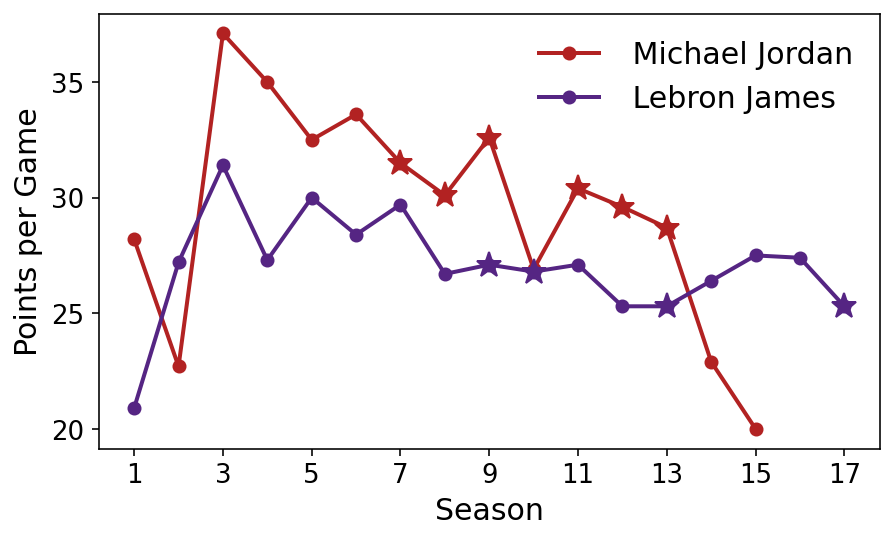

In [18]:
fig = plt.figure(figsize = (7, 4))

plt.plot(mj_df.index, mj_df['Points per game'], color = 'firebrick', marker = 'o', lw = 2, markersize = 6, label = ' Michael Jordan')
plt.plot(mj_champion_df.index, mj_champion_df['Points per game'], color = 'firebrick', marker = '*', linestyle = '', lw = 2, markersize = 13)

plt.plot(lj_df.index, lj_df['Points per game'], color = '#552583', marker = 'o', lw = 2, markersize = 6, label = ' Lebron James')
plt.plot(lj_champion_df.index, lj_champion_df['Points per game'], color = '#552583', marker = '*', linestyle = '', lw = 2, markersize = 13)

plt.xlabel('Season', size = font_size)
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17], size = font_size - 2)

plt.ylabel('Points per Game', size = font_size)
plt.yticks([20, 25, 30, 35], size = font_size - 2)

plt.legend(fontsize = font_size, frameon = False);

In overall, both players display a similar performance (always in terms of 'Points per game') with a few notable differences.

Firstly, both MJ and LJ had a good first season, scoring 28.2 and 20.9 points per game, respectively, and both receiving the 'NBA Rookie of the Year' award. Jordan's second season was cut short due to an injury ([source](https://en.wikipedia.org/wiki/Michael_Jordan)), which could justify the dip we observe in season #2.

Interestingly, both players reached the peak of their performance during the third season of their career. In this season, Jordan's performance was significantly better with an average of 37.1 points per game, compared to 31.4 for Lebron.

Jordan's performance starts decreasing on average after his third year in Chicago, reaching a career low of 20.0 points per game during his final year as a Washington Wizards player. However,  for 11 consequtive seasons (3-13 in the figure), he had a higher points per game average than Lebron.

On the other hand, Lebron displays a more constant presence as his career progressed. I find really interesting that as a Miami Heat player (years 8-11), Lebron's average reaches a plateau around 27.0. In the 15th year of his career (MJ retired after 15 non-consequtive years), Lebron averaged 7 points more than MJ.

We note that having a high average doesn't guarantee an NBA championship ring. Both players achieved high averages during their early stages, but won the championship later in their career.

Lastly, I have to clarify that we cannot accurately judge a player's performance just by looking at one statistic. Additionally, MJ and LJ are two of the greatest basketball players and athletes of all time, so any comparison is unfair if we don't factor in more statistics and other parameters (e.g teammate performance).

## Conclusions

In this kernel, we learnt how to build a web scrapper that retrieves basketball statistics in the form of a table from Wikipedia. Our function requires two specialized Python libraries: `requests` and `BeautifulSoup`.

We then used the scrapper for Michael Jordan, one of the greatest basketball players of all time. We created a pandas dataframe and made some interesting observations about some of his career statistics. We also plotted MJ's 'Points per Game' for every season and observed how it evolved with time.

Finally, we used the same statistic to compare MJ with another great player, Lebron James.